# Loading the dataset

In [165]:
df = pd.read_csv('housing.csv')

In [166]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Question 1: How would you check for missing values or anomalies in the dataset before starting any analysis?

In [167]:
df.shape

(20640, 10)

In [168]:
## The number of rows in the dataset is 20640, and we have 10 columns

In [169]:
## First : Check if there are any duplicate data

In [170]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [171]:
## So we have no duplicate rows

In [172]:
## Second : Check if there are null values in the dataset

In [173]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [174]:
percentage_of_missing_bedrooms = (207 * 100)/20640

In [175]:
percentage_of_missing_bedrooms

1.002906976744186

In [176]:
## Plotting the distribution of number of bedrooms

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

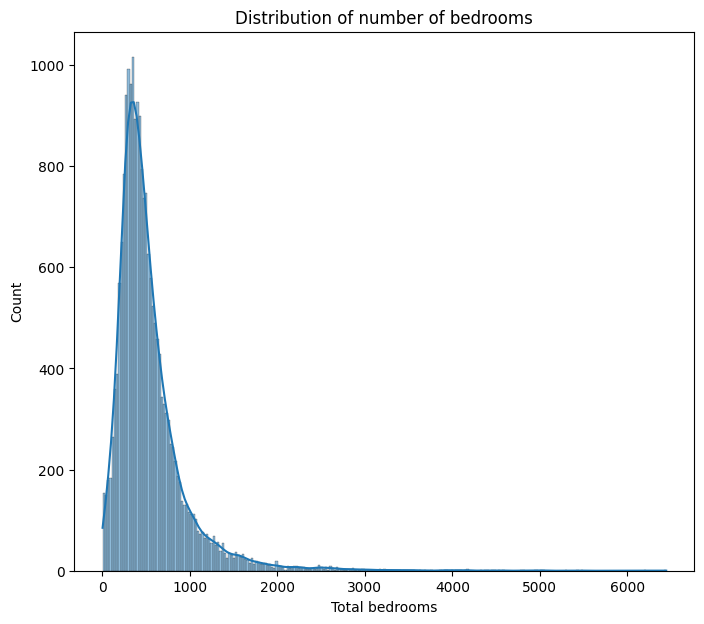

In [178]:
fix, ax = plt.subplots(figsize = (8, 7))
ax.set_title('Distribution of number of bedrooms')
ax.set_xlabel('Total bedrooms')
ax.set_ylabel('Count')
sns.histplot(x = 'total_bedrooms', data = df, kde = True)
plt.show()

In [179]:
## From the figure above, we see that the distribution is right skewed. Taking median to replace the missing values in number of bedrooms column will be good enough

In [180]:
median_of_number_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_of_number_bedrooms)

## Question 2: If you were asked to understand the relationship between median income and median house value, what specific visualization would you create first, and why?

In [181]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


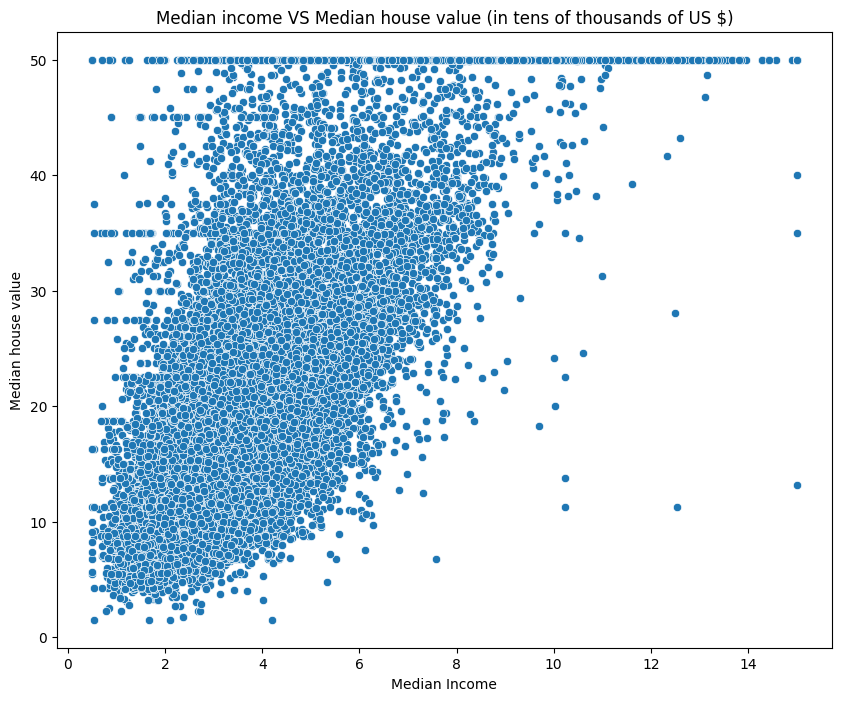

In [182]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('Median income VS Median house value (in tens of thousands of US $)')
ax.set_xlabel('Median Income')
ax.set_ylabel('Median house value')
sns.scatterplot(x = 'median_income', y = df['median_house_value']/10000, data = df)
plt.show()

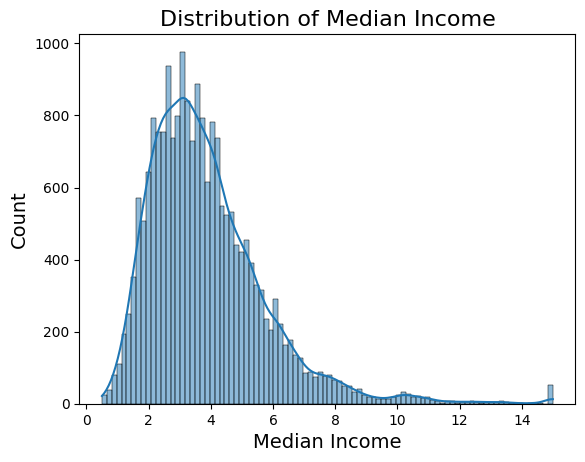

In [183]:
fig, ax = plt.subplots()
ax.set_title('Distribution of Median Income', fontsize = 16)
ax.set_xlabel('Median Income', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
sns.histplot(x = 'median_income', data = df, kde = True)
plt.show()

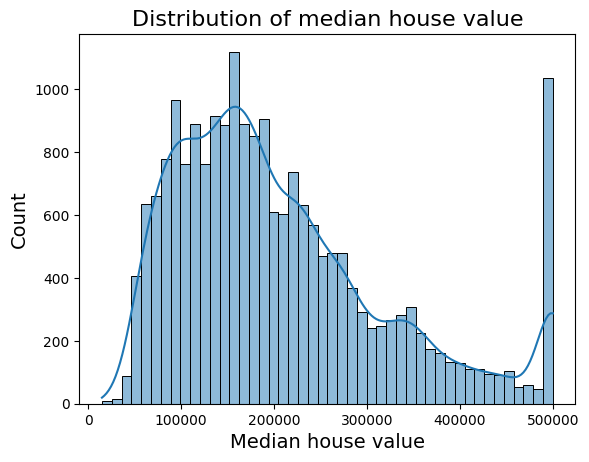

In [184]:
fig, ax = plt.subplots()
ax.set_title('Distribution of median house value', fontsize = 16)
ax.set_xlabel('Median house value', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
sns.histplot(x = 'median_house_value', data = df, kde = True)
plt.show()

In [185]:
## From the lineplot of Median income Vs Median house value, shows that mostly with the increase in house income , house value also tends to increase.
## We also see some outliers in the graphs
## Both both the distribution plots, it confirms the presence of outliers

## Question 3: Suppose you want to formally test whether median income is significantly associated with median house value. What statistical test or approach would you use, and why?

### First: Pearson correlation coefficient

In [186]:
## Pearson's correlation coefficient measures the linear relationship between two variables, -1 to 1
## -1 -> Perfect negative correlation
## 0 -> No correlation
## 1 -> Positive correlation

In [187]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [188]:
df['median_income'].corr(df['median_house_value'])

np.float64(0.6880752079585478)

In [189]:
## Correlation is 0.688, which shows it is positive correlated, i.e; higher the median_income, higher the house value for atleat 70% times

### Second: Simple Linear Regression

In [190]:
from sklearn import linear_model

In [191]:
model = linear_model.LinearRegression()

In [192]:
X = df[['median_income']]
y = df['median_house_value']

In [193]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [194]:
slope = model.coef_
slope

array([41793.8492019])

In [195]:
model.intercept_

np.float64(45085.5767032679)

In [196]:
## We see that the slope is positive, which indicates that with increase in median income , median house value increases

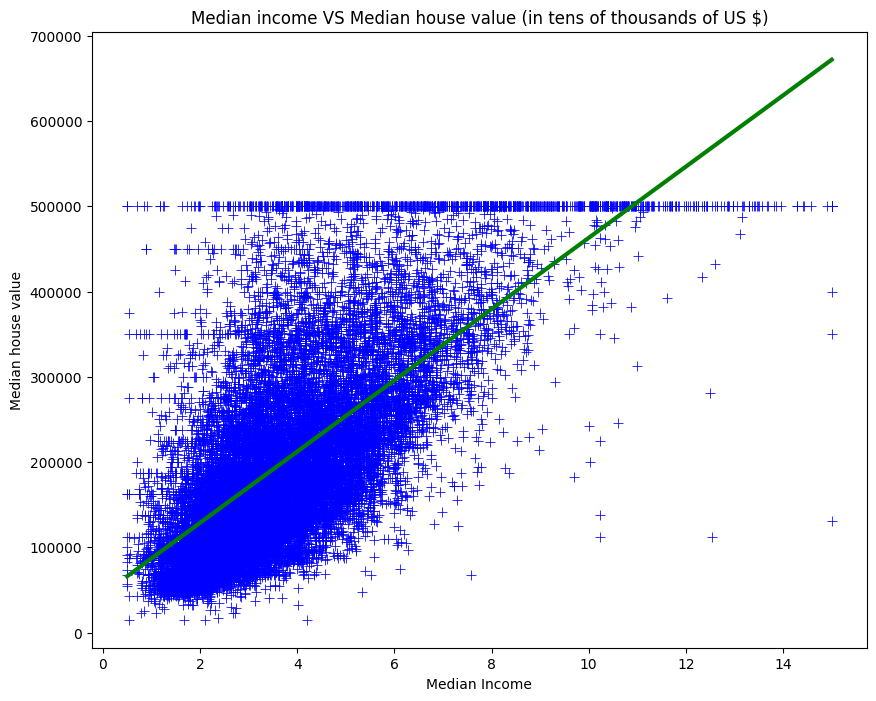

In [197]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('Median income VS Median house value (in tens of thousands of US $)')
ax.set_xlabel('Median Income')
ax.set_ylabel('Median house value')
sns.scatterplot(x = 'median_income', y = df['median_house_value'], data = df, marker = '+', s = 50, color = 'blue')
sns.lineplot(x = 'median_income', y = model.predict(X), data = df, color = 'green', lw = '3')
plt.show()

### Third: Statistical Significance

In [198]:
import statsmodels.api as sm

In [199]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [200]:
X = df[['median_income']]
y = df['median_house_value']

In [201]:
X = sm.add_constant(X)

In [202]:
model = sm.OLS(y, X).fit()

In [203]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:57:38   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082

In [204]:
## Here, we see that P > |t|, if < 0.05 , suggest there is a significant relationship 

### Fourth: Model fit quality

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [206]:
import numpy as np
from sklearn import linear_model
model = linear_model.LinearRegression()

In [207]:
X = df[['median_income']]
y = df['median_house_value']
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [208]:
y_pred = model.predict(X)

In [209]:
print("R2: ", r2_score(y, y_pred))

R2:  0.47344749180719903


In [210]:
print("Root Mean squared error : ", np.sqrt(mean_squared_error(y, y_pred)))

Root Mean squared error :  83733.57452616918


In [211]:
print("Mean absolute error : ", mean_absolute_error(y, y_pred))

Mean absolute error :  62625.9337911434


## Question: Now that you’ve evaluated the single-variable model, what specific feature(s) from the California Housing dataset would you add next to improve prediction accuracy — and why?

In [84]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### first : checking for housing_median_age

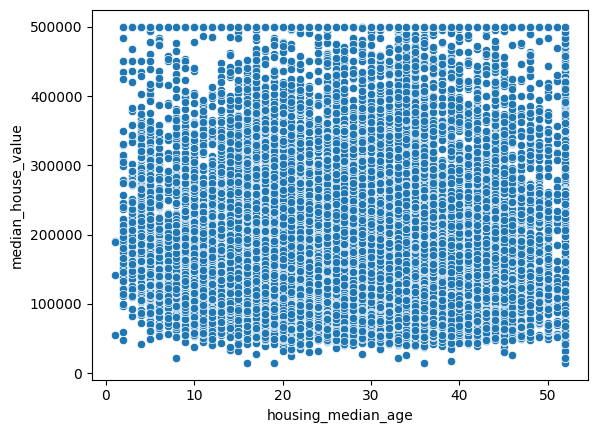

In [87]:
sns.scatterplot(x = 'housing_median_age', y = 'median_house_value', data = df)
plt.show()

In [88]:
df['housing_median_age'].corr(df['median_house_value'])

np.float64(0.10562341249320994)

In [89]:
##  clearing explains housing_median_age itself doesnot have any affect on the median_house_value

### second : checking for total_rooms

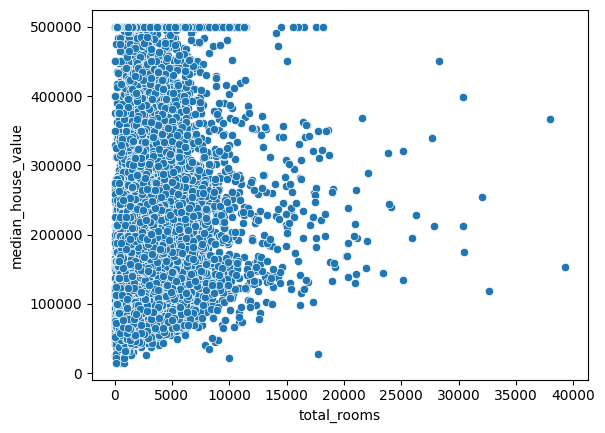

In [91]:
sns.scatterplot(x = 'total_rooms', y = 'median_house_value', data = df)
plt.show()

In [92]:
df['total_rooms'].corr(df['median_house_value'])

np.float64(0.13415311380656308)

In [93]:
##  clearing explains total_rooms itself doesnot have any affect on the median_house_value

### third : checking for total_bedrooms

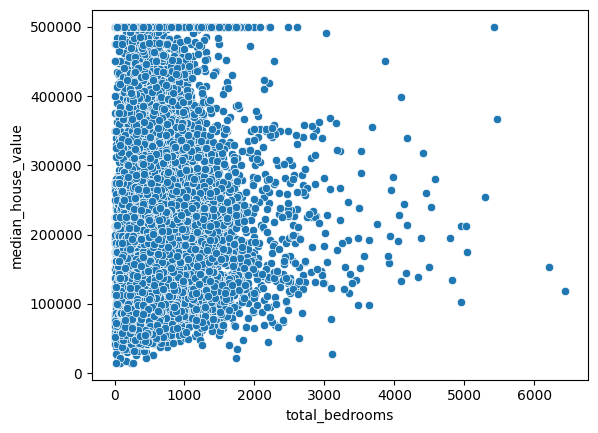

In [94]:
sns.scatterplot(x = 'total_bedrooms', y = 'median_house_value', data = df)
plt.show()

In [95]:
## nah

### third : checking for populations

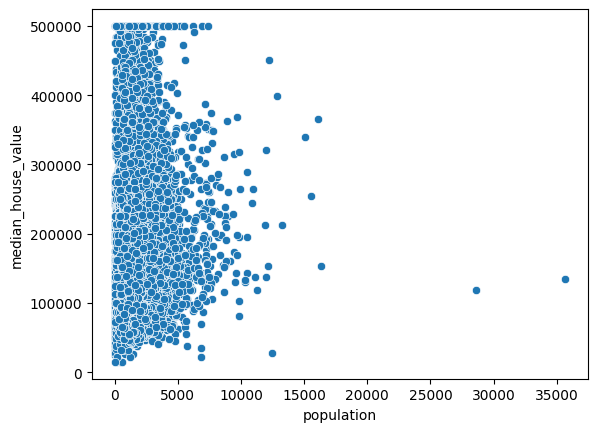

In [97]:
sns.scatterplot(x = 'population', y = 'median_house_value', data = df)
plt.show()

### third : checking for households

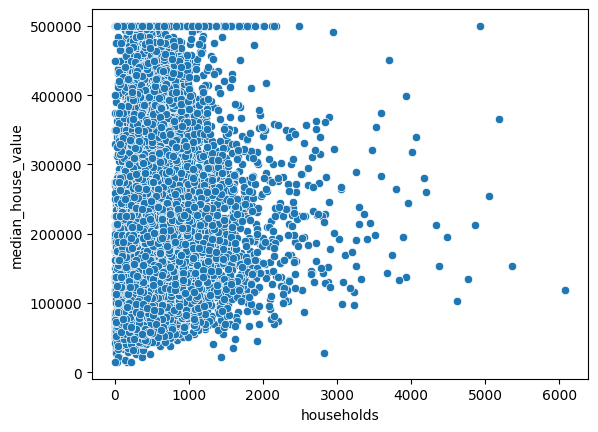

In [98]:
sns.scatterplot(x = 'households', y = 'median_house_value', data = df)
plt.show()

In [99]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [104]:
df_grouped = df.groupby(['ocean_proximity']).agg(avg_median_house_value = ('median_house_value', 'mean'))

In [106]:
df_grouped.sort_values(['avg_median_house_value'], ascending = False, inplace = True)

In [107]:
df_grouped

,avg_median_house_value
ocean_proximity,
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427
<1H OCEAN,240084.285464
INLAND,124805.392001


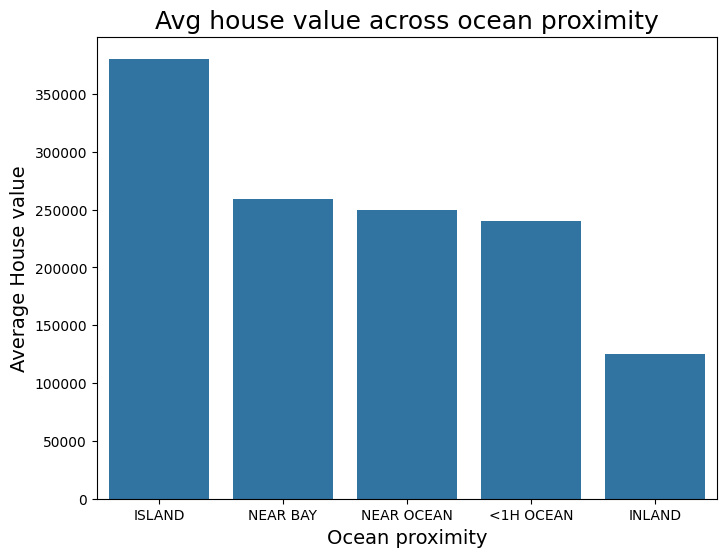

In [110]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Avg house value across ocean proximity', fontsize = 18)
ax.set_xlabel('Ocean proximity', fontsize = 14)
ax.set_ylabel('Average House value', fontsize = 14)
sns.barplot(x = df_grouped.index, y = 'avg_median_house_value', data = df_grouped)
plt.show()

In [ ]:
## From the data that we analysed, we see that ocean proximity plays a key significant role in determining the house value
## Others like housing_median_age, total_rooms, total_bedrooms, population, households does not directly affect the house value, may be together they can

In [112]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [113]:
numerical_df = df.drop('ocean_proximity', axis = 'columns')

In [115]:
updated_df = numerical_df.corr()

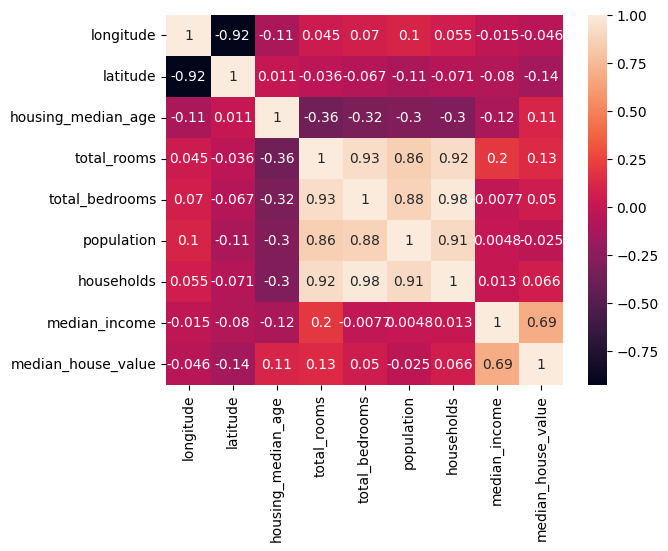

In [117]:
sns.heatmap(updated_df, annot = True)
plt.show()

## Question: How would you transform the ocean_proximity variable into a numerical format suitable for regression? Specifically, would you use dummy variables or one‑hot encoding, and what are the pros and cons of your choice?

In [118]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [212]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [213]:
## From the data I see that ocean_proximity is a nominal value, not an ordinal categorical variable

In [214]:
## So we will use one hot encoding (dummy variables)

In [215]:
df_ocean_proximity_encoding = pd.get_dummies(df['ocean_proximity'],drop_first = True, dtype = int)

In [216]:
df_ocean_proximity_encoding.head(2)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0


In [217]:
merged_df = pd.concat([df.drop('ocean_proximity', axis = 'columns'), df_ocean_proximity_encoding], axis = 'columns')

In [218]:
merged_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


## Question: How would you scale or normalize the numerical features in this dataset, and why is scaling important for regression models?

In [133]:
## There are three types of scaling -> Standardization ->  preserves outliers, 
##                                     Min-Max Normalization -> sensitive to outlier [0, 1] neural networks,
##                                     Robust Scaling -> less sensitive to outliers

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
scaler = StandardScaler()

In [221]:
scaled_features = scaler.fit_transform(df[['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households']])

In [222]:
scaled_features

array([[ 2.34476576, -0.8048191 , -0.97247648, -0.9744286 , -0.97703285],
       [ 2.33223796,  2.0458901 ,  1.35714343,  0.86143887,  1.66996103],
       [ 1.7826994 , -0.53574589, -0.82702426, -0.82077735, -0.84363692],
       ...,
       [-1.14259331, -0.17499526, -0.12360781, -0.3695372 , -0.17404163],
       [-1.05458292, -0.35559977, -0.30482697, -0.60442933, -0.39375258],
       [-0.78012947,  0.06840827,  0.18875678, -0.03397701,  0.07967221]],
      shape=(20640, 5))

In [223]:
scaled_df = pd.DataFrame(scaled_features, columns = ['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households'], index = df.index)

In [141]:
scaled_df.head()

,median_income,total_rooms,total_bedrooms,population,households
0,2.344766,-0.804819,-0.970325,-0.974429,-0.977033
1,2.332238,2.045890,1.348276,0.861439,1.669961
2,1.782699,-0.535746,-0.825561,-0.820777,-0.843637
3,0.932968,-0.624215,-0.718768,-0.766028,-0.733781
4,-0.012881,-0.462404,-0.611974,-0.759847,-0.629157


### Question: How would you detect multicollinearity among predictors in the California Housing dataset, and what metric would you use to quantify it?

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [144]:
merged_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [145]:
X = merged_df.drop('median_house_value', axis = 1)
X = add_constant(X)

In [159]:
median_total_bedrooms = X['total_bedrooms'].median()
X['total_bedrooms'] = X['total_bedrooms'].fillna(median_total_bedrooms)

In [160]:
vif_data = pd.DataFrame()

In [161]:
vif_data["feature"] = X.columns

In [162]:
vif_data

,feature
0,const
1,longitude
2,latitude
3,housing_median_age
4,total_rooms
5,total_bedrooms
6,population
7,households
8,median_income
9,INLAND


In [163]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [164]:
vif_data

,feature,VIF
0,const,33435.770831
1,longitude,18.028444
2,latitude,19.925764
3,housing_median_age,1.321927
4,total_rooms,12.349114
5,total_bedrooms,27.040073
6,population,6.342122
7,households,28.315383
8,median_income,1.740468
9,INLAND,2.853630


### Setting up a multiple linear regression with all prepared features and then evaluating its performance (R², RMSE, MAE) — so you can compare it against your single-variable model

In [224]:
# Extract dummy variables from merged_df (already encoded)
dummy_vars = merged_df[['NEAR BAY','NEAR OCEAN','INLAND','ISLAND']]  # example, depends on your encoding

# Combine scaled numerical features with dummy variables
X = pd.concat([scaled_df, dummy_vars], axis=1)

# Target variable
y = merged_df['median_house_value']


In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

In [227]:
from sklearn import linear_model

In [228]:
model = linear_model.LinearRegression()

In [229]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [231]:
y_pred = model.predict(X_test)

In [233]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [234]:
print("R²:", r2_score(y_test, y_pred)) 
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) 
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.616527500863245
RMSE: 70374.31178220059
MAE: 50921.08637801997


In [235]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [236]:
# Ridge Regression 
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train) 
print("Ridge R²:", r2_score(y_test, ridge.predict(X_test)))

Ridge R²: 0.6165294787813534


In [237]:
# Lasso Regression 
lasso = Lasso(alpha=0.01) 
lasso.fit(X_train, y_train) 
print("Lasso R²:", r2_score(y_test, lasso.predict(X_test)))

Lasso R²: 0.616527537598621
